### exe-1) 학생 키에 대한 두 집단 비교

In [116]:
import numpy as np
from scipy import stats

In [117]:
### 데이터 생성하기
# 최소값 157~최대값 178까지의 범위 중에 size 20개 생성
group1Heights = np.random.randint(low=157, high=178, size=20)
print('group1Heights = ', group1Heights)
group2Heights = np.random.randint(low=162, high=182, size=20)
print('group2Heights = ', group2Heights)

group1Heights =  [177 157 165 161 157 167 163 166 161 175 164 172 172 160 174 167 169 170
 159 170]
group2Heights =  [164 173 162 166 176 162 177 174 179 167 179 180 165 167 170 173 168 168
 177 168]


In [118]:
# 검증하기 (Independent Samples t-test)
# 첫번째 : 기준집단
# 두번째 : 관측집단
tResult = stats.ttest_ind(group1Heights, group2Heights)

print('두 집단 평균 검정 (두 집단 표본검정) = ', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))

# (해석)
# 1. p-value = 0.378 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 평균의 차이는 없다.

두 집단 평균 검정 (두 집단 표본검정) =  Ttest_indResult(statistic=-2.3662479650067274, pvalue=0.023170754328362134)
t-검정 통계량 = -2.366, p-value = 0.023


### exe-2) 남녀 두 집단 간 파이썬 시험의 평균차이 검정
##### - 귀무가설 : 남녀 두 집단 간 파이썬 시험의 평균에 차이가 없다.
##### - 대립가설 : 남녀 두 집단 간 파이썬 시험의 평균에 차이가 있다.

In [119]:
import numpy as np
import scipy.stats as stats

In [120]:
### 데이터 생성
male = [75, 85, 100, 72.5, 86.5]
female = [63.2, 76, 52, 100, 70]

In [121]:
print(np.array(male).mean())
print(np.array(female).mean())

83.8
72.24


In [122]:
# 두 집단 검증하기
tResult = stats.ttest_ind(male, female)

print('두 집단 평균 검정 (두 집단 표본검정) = ', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))
# (해석)
# 1. p-value = 0.253 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단의 평균은 서로 같다.

두 집단 평균 검정 (두 집단 표본검정) =  Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)
t-검정 통계량 = 1.233, p-value = 0.253


### exe-3) 두가지 교육방법에 따른 평균학점에 대한 차이 검정수행
##### - 귀무가설 : 두 교육방법에 따른 평균학점에는 차이가 없다
##### - 대립가설 : 두 교육방법에 따른 평균학점에는 차이가 있다

In [123]:
# 데이터 가지고 오기 ; two_sample.csv 사용
import pandas as pd

# 교육방법 1과 2를 추출해 주세요.
# 교육방법1에 대한 데이터 변수 : m1 변수에 저장
# 교육방법2에 대한 데이터 변수 : m2 변수에 저장

# 교육방법1에 대한 학점만 추출한 데이터 변수 : scor1 변수에 저장
# 교육방법2에 대한 학점만 추출한 데이터 변수 : scor2 변수에 저장

# 결측치 처리까지 : 결측치는 평균으로 처리
# 결측치 처리 후 -> 자기 변수에 저장(scor1, scor2)

In [124]:
file_path = './data/two_sample.csv'

df = pd.read_csv(file_path)

m1 = df[df['교육방법'] == 1]
m2 = df[df['교육방법'] == 2].reset_index(drop=True)

scor1 = m1['학점']
scor2 = m2['학점']

In [125]:
scor1 = scor1.fillna(scor1.mean())
scor2 = scor2.fillna(scor2.mean())

In [126]:
# 정규성 확인

resultSh = stats.shapiro(scor1)
print('정규성 검정 결과 = ', resultSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(resultSh))

# (해석)
# - p-value = 0.803 > 0.05 이므로, 정규성을 만족한다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9615016579627991, pvalue=0.8028513789176941)
검정 통계량 = 0.962, p-value = 0.803


In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

C:\DEV\Tools\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


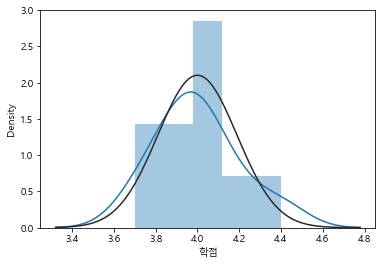

In [128]:
sns.distplot(scor1, fit=stats.norm)
plt.show()

In [129]:
# 정규성 확인

resultSh = stats.shapiro(scor2)
print('정규성 검정 결과 = ', resultSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(resultSh))

# (해석)
# - p-value = 0.336 > 0.05 이므로, 정규성을 만족한다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9173869490623474, pvalue=0.3356756865978241)
검정 통계량 = 0.917, p-value = 0.336


C:\DEV\Tools\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


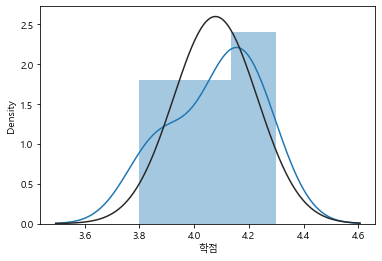

In [130]:
sns.distplot(scor2, fit=stats.norm)
plt.show()

In [131]:
### 등분산성 검증
# - 귀무가설 : 두 집단간 분산이 동일하다.(p-value > 0.05)
# - 대립가설 : 두 집단간 분산이 동일하지 않다.

# 등분산성 검증은 3가지 방법으로 진행됩니다.
#1. levene(레빈) 방법
#2. fligner(플리그너) 방법
#3. bartlett(바틀렛) 방법

# 1.
sLevene = stats.levene(scor1, scor2)
print('정규성 검정 결과 =',  sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f ' %(sLevene))
print(sLevene)
#-p -value 는 0.742 >0.05이므로 귀무가설에 채택함
# 귀무가설 채택: 두 집단간 등분산성이 만족을 한다..

# 2.
sFligner = stats.fligner(scor1, scor2)
print('정규성 검정 결과 =',  sFligner)
print('t-검정 통계량 = %.3f, p-value = %.3f ' %(sFligner))
print(sFligner)
#-p -value 는 0.923 >0.05이므로 귀무가설에 채택함
# 귀무가설 채택: 두 집단간 등분산성이 만족을 한다..

# 3.
sBartlett = stats.bartlett(scor1, scor2)
print('정규성 검정 결과 =',  sBartlett)
print('t-검정 통계량 = %.3f, p-value = %.3f ' %(sBartlett))
print(sFligner)
#-p -value 는 0.537 >0.05이므로 귀무가설에 채택함
# 귀무가설 채택: 두 집단간 등분산성이 만족을 한다..


#세 가지 방식중에 filgner방식이 제일 높은 분석이 나옴

정규성 검정 결과 = LeveneResult(statistic=0.11149825783972156, pvalue=0.7423035272233627)
t-검정 통계량 = 0.111, p-value = 0.742 
LeveneResult(statistic=0.11149825783972156, pvalue=0.7423035272233627)
정규성 검정 결과 = FlignerResult(statistic=0.009351524793910174, pvalue=0.9229620332079382)
t-검정 통계량 = 0.009, p-value = 0.923 
FlignerResult(statistic=0.009351524793910174, pvalue=0.9229620332079382)
정규성 검정 결과 = BartlettResult(statistic=0.38065029633127184, pvalue=0.5372554141124455)
t-검정 통계량 = 0.381, p-value = 0.537 
FlignerResult(statistic=0.009351524793910174, pvalue=0.9229620332079382)


In [132]:
# 두 집단 검증하기
tResult = stats.ttest_ind(scor1, scor2)

print('두 집단 평균 검정 (두 집단 표본검정) = ', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))
# (해석)
# 1. p-value = 0.352 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단의 평균은 서로 거의 유사하다.

두 집단 평균 검정 (두 집단 표본검정) =  Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956, p-value = 0.352


In [133]:
# 두 집단 검증하기
# equal_var : 정규성과 등분산성 모두를 만족하는 경우 작성
tResult = stats.ttest_ind(scor1, scor2, equal_var=True)

print('두 집단 평균 검정 (두 집단 표본검정) = ', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))
# (해석)
# 1. p-value = 0.352 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단의 평균은 서로 거의 유사하다.

두 집단 평균 검정 (두 집단 표본검정) =  Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956, p-value = 0.352


### exe-4) 어느 음식점의 매출자료와 날씨자료를 이용하여
### ....강수 여부에 따른 매출의 차이에 대하여 분석..

##### 집단1: 비가 올때의 매출
##### 집단2: 비가 안올때의 매출
##### - 귀무가설 : 강수여부에 따른 매출액 평균에 차이가 없다.
##### - 대립가설 : 강수여부에 따른 매출액 평균에 차이가 있다.

In [134]:
# 사용 라이브러리
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# 매출 데이터 : tsales.csv
#  - YMD : 날짜, AMT : 매출, CNT : 매출건수

# 날씨 데이터 : tweather.csv
#  - tm : 날짜, sumRn : 강수량

In [136]:
# 파일을 불러오면서 YMD라는 컬럼이 있으면 object 타입으로 바꿔라
# sales_data = pd.read_csv(file_path, dtype={'YMD' : 'object'})

file_path = './data/tsales.csv'
df1 = pd.read_csv(file_path)
df1

,YMD,AMT,CNT
0,20190514,0,1
1,20190519,18000,1
2,20190521,50000,4
3,20190522,125000,7
4,20190523,222500,13
...,...,...,...
323,20200424,1092500,51
324,20200425,672500,34
325,20200426,1123500,55
326,20200427,819500,45


In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YMD     328 non-null    int64
 1   AMT     328 non-null    int64
 2   CNT     328 non-null    int64
dtypes: int64(3)
memory usage: 7.8 KB


In [138]:
df1.describe()

,YMD,AMT,CNT
count,3.280000e+02,3.280000e+02,328.000000
mean,2.019406e+07,7.600000e+05,40.823171
std,4.447262e+03,2.980138e+05,18.908580
min,2.019051e+07,0.000000e+00,1.000000
25%,2.019081e+07,5.367500e+05,27.000000
50%,2.019111e+07,7.700000e+05,38.000000
75%,2.020020e+07,9.855000e+05,55.000000
max,2.020043e+07,1.429000e+06,97.000000


In [139]:
df1.isnull().sum()

YMD    0
AMT    0
CNT    0
dtype: int64

In [140]:
df1.duplicated().sum()

0

In [141]:
file_path = './data/tweather.csv'
df2 = pd.read_csv(file_path)
df2

,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,108,2018-06-01,23.8,17.5,30.2,0.0,4.3,1.9,0.0
1,108,2018-06-02,23.4,17.6,30.1,0.0,4.5,2.0,0.0
2,108,2018-06-03,24.0,16.9,30.8,0.0,4.2,1.6,0.0
3,108,2018-06-04,22.6,18.9,27.5,0.0,4.4,1.9,0.0
4,108,2018-06-05,23.7,17.7,29.2,0.0,4.0,1.7,0.0
...,...,...,...,...,...,...,...,...,...
697,108,2020-04-28,13.9,7.8,19.9,0.0,5.5,3.0,0.0
698,108,2020-04-29,14.9,9.3,21.0,0.0,5.2,2.6,0.0
699,108,2020-04-30,17.1,9.3,23.4,0.0,5.9,2.7,0.0
700,108,2020-05-01,20.2,16.4,26.2,0.0,5.5,2.7,0.0


In [142]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stnId   702 non-null    int64  
 1   tm      702 non-null    object 
 2   avgTa   702 non-null    float64
 3   minTa   702 non-null    float64
 4   maxTa   702 non-null    float64
 5   sumRn   702 non-null    float64
 6   maxWs   702 non-null    float64
 7   avgWs   702 non-null    float64
 8   ddMes   702 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 49.5+ KB


In [143]:
df2.describe()

,stnId,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
count,702.0,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,108.0,13.409544,9.212536,18.377635,2.681339,4.253419,1.935897,0.049288
std,0.0,10.429220,10.577157,10.561196,9.628046,1.187564,0.688789,0.471642
min,108.0,-10.500000,-14.400000,-6.600000,0.000000,1.600000,0.600000,0.000000
25%,108.0,4.625000,0.300000,9.425000,0.000000,3.400000,1.500000,0.000000
50%,108.0,12.600000,7.950000,18.650000,0.000000,4.200000,1.800000,0.000000
75%,108.0,22.900000,18.900000,27.575000,0.100000,4.900000,2.300000,0.000000
max,108.0,33.700000,30.300000,39.600000,96.500000,11.800000,6.000000,8.800000


In [144]:
df2.isnull().sum()

stnId    0
tm       0
avgTa    0
minTa    0
maxTa    0
sumRn    0
maxWs    0
avgWs    0
ddMes    0
dtype: int64

In [145]:
df2.duplicated().sum()

0

In [146]:
df2['tm']

0      2018-06-01
1      2018-06-02
2      2018-06-03
3      2018-06-04
4      2018-06-05
          ...    
697    2020-04-28
698    2020-04-29
699    2020-04-30
700    2020-05-01
701    2020-05-02
Name: tm, Length: 702, dtype: object

In [147]:
# wt_data['tm'] = wt_data['tm'].str.replace('-', '')
df2['tm'] = (df2['tm'].str[0:4] + df2['tm'].str[5:7] + df2['tm'].str[8:10])
df2

,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,108,20180601,23.8,17.5,30.2,0.0,4.3,1.9,0.0
1,108,20180602,23.4,17.6,30.1,0.0,4.5,2.0,0.0
2,108,20180603,24.0,16.9,30.8,0.0,4.2,1.6,0.0
3,108,20180604,22.6,18.9,27.5,0.0,4.4,1.9,0.0
4,108,20180605,23.7,17.7,29.2,0.0,4.0,1.7,0.0
...,...,...,...,...,...,...,...,...,...
697,108,20200428,13.9,7.8,19.9,0.0,5.5,3.0,0.0
698,108,20200429,14.9,9.3,21.0,0.0,5.2,2.6,0.0
699,108,20200430,17.1,9.3,23.4,0.0,5.9,2.7,0.0
700,108,20200501,20.2,16.4,26.2,0.0,5.5,2.7,0.0


In [148]:
df2['tm'] = df2['tm'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stnId   702 non-null    int64  
 1   tm      702 non-null    int32  
 2   avgTa   702 non-null    float64
 3   minTa   702 non-null    float64
 4   maxTa   702 non-null    float64
 5   sumRn   702 non-null    float64
 6   maxWs   702 non-null    float64
 7   avgWs   702 non-null    float64
 8   ddMes   702 non-null    float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 46.7 KB


In [149]:
df = pd.merge(df1, df2, how='inner', left_on='YMD', right_on='tm')
df

,YMD,AMT,CNT,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,20190514,0,1,108,20190514,19.6,12.9,26.9,0.0,4.1,1.6,0.0
1,20190519,18000,1,108,20190519,19.4,17.9,21.6,22.0,2.7,1.2,0.0
2,20190521,50000,4,108,20190521,17.2,11.7,23.8,0.0,5.9,2.9,0.0
3,20190522,125000,7,108,20190522,19.5,12.3,26.5,0.0,5.4,2.4,0.0
4,20190523,222500,13,108,20190523,22.1,15.0,29.2,0.0,3.5,1.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323,20200424,1092500,51,108,20200424,9.9,4.1,14.3,0.0,8.2,3.9,0.0
324,20200425,672500,34,108,20200425,13.1,9.9,17.1,0.0,7.8,3.9,0.0
325,20200426,1123500,55,108,20200426,12.3,6.8,19.0,0.0,6.5,3.2,0.0
326,20200427,819500,45,108,20200427,12.9,8.7,18.3,0.0,5.5,2.8,0.0


In [150]:
df_rain = df[df['sumRn'] == 0]
df_rain

,YMD,AMT,CNT,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,20190514,0,1,108,20190514,19.6,12.9,26.9,0.0,4.1,1.6,0.0
2,20190521,50000,4,108,20190521,17.2,11.7,23.8,0.0,5.9,2.9,0.0
3,20190522,125000,7,108,20190522,19.5,12.3,26.5,0.0,5.4,2.4,0.0
4,20190523,222500,13,108,20190523,22.1,15.0,29.2,0.0,3.5,1.7,0.0
5,20190524,209000,12,108,20190524,24.2,16.2,33.4,0.0,4.1,1.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323,20200424,1092500,51,108,20200424,9.9,4.1,14.3,0.0,8.2,3.9,0.0
324,20200425,672500,34,108,20200425,13.1,9.9,17.1,0.0,7.8,3.9,0.0
325,20200426,1123500,55,108,20200426,12.3,6.8,19.0,0.0,6.5,3.2,0.0
326,20200427,819500,45,108,20200427,12.9,8.7,18.3,0.0,5.5,2.8,0.0


In [151]:
df_sunny = df[df['sumRn'] != 0]
df_sunny

,YMD,AMT,CNT,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
1,20190519,18000,1,108,20190519,19.4,17.9,21.6,22.0,2.7,1.2,0.0
8,20190527,274000,13,108,20190527,17.8,14.3,22.3,7.1,5.3,2.4,0.0
18,20190606,318000,20,108,20190606,21.2,18.6,25.1,7.5,4.1,1.2,0.0
19,20190607,139500,8,108,20190607,20.0,17.0,24.7,35.3,3.5,1.9,0.0
21,20190609,482500,27,108,20190609,21.6,17.1,26.5,2.5,4.0,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
282,20200313,933000,42,108,20200313,4.9,-0.1,8.7,0.5,5.4,3.3,0.0
295,20200326,700000,37,108,20200326,14.8,8.1,20.6,1.8,5.3,1.9,0.0
296,20200327,760500,29,108,20200327,11.9,6.7,15.8,2.0,5.8,3.3,0.0
318,20200419,908000,51,108,20200419,12.3,9.5,15.5,10.3,5.2,2.7,0.0


In [152]:
rain_amt = df_rain['AMT']
rain_amt

0            0
2        50000
3       125000
4       222500
5       209000
        ...   
323    1092500
324     672500
325    1123500
326     819500
327     950500
Name: AMT, Length: 236, dtype: int64

In [153]:
sunny_amt = df_sunny['AMT']
sunny_amt

1       18000
8      274000
18     318000
19     139500
21     482500
        ...  
282    933000
295    700000
296    760500
318    908000
319    741000
Name: AMT, Length: 92, dtype: int64

In [154]:
# 정규성 확인

resultSh = stats.shapiro(rain_amt)
print('정규성 검정 결과 = ', resultSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(resultSh))

# (해석)
# - p-value = 0.056 > 0.05 이므로, 정규성을 만족한다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9884955883026123, pvalue=0.056049469858407974)
검정 통계량 = 0.988, p-value = 0.056


In [155]:
# 정규성 확인

resultSh = stats.shapiro(sunny_amt)
print('정규성 검정 결과 = ', resultSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(resultSh))

# (해석)
# - p-value = 0.883 > 0.05 이므로, 정규성을 만족한다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9924222826957703, pvalue=0.882739782333374)
검정 통계량 = 0.992, p-value = 0.883


C:\DEV\Tools\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\DEV\Tools\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\DEV\Tools\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


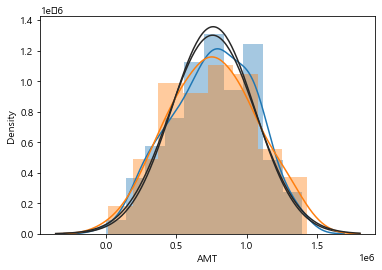

In [159]:
sns.distplot(rain_amt, fit=stats.norm)
sns.distplot(sunny_amt, fit=stats.norm)
plt.show()

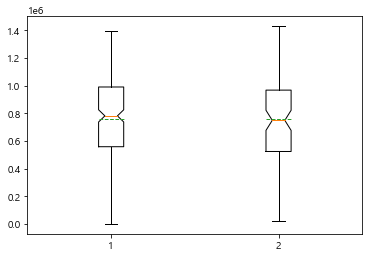

In [160]:
plt.boxplot([rain_amt, sunny_amt],
            meanline = True,
            showmeans = True,
            notch = True)
plt.show()

In [161]:
### 등분산성 검증
# - 귀무가설 : 두 집단간 분산이 동일하다.(p-value > 0.05)
# - 대립가설 : 두 집단간 분산이 동일하지 않다.

# 등분산성 검증은 3가지 방법으로 진행됩니다.
#1. levene(레빈) 방법
#2. fligner(플리그너) 방법
#3. bartlett(바틀렛) 방법

# 1.
sLevene = stats.levene(rain_amt, sunny_amt)
print('정규성 검정 결과 =',  sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f ' %(sLevene))
print(sLevene)
#-p -value 는 0.712 >0.05이므로 귀무가설에 채택함
# 귀무가설 채택: 두 집단간 등분산성이 만족을 한다..

# 2.
sFligner = stats.fligner(rain_amt, sunny_amt)
print('정규성 검정 결과 =',  sFligner)
print('t-검정 통계량 = %.3f, p-value = %.3f ' %(sFligner))
print(sFligner)
#-p -value 는 0.705 >0.05이므로 귀무가설에 채택함
# 귀무가설 채택: 두 집단간 등분산성이 만족을 한다..

# 3.
sBartlett = stats.bartlett(rain_amt, sunny_amt)
print('정규성 검정 결과 =',  sBartlett)
print('t-검정 통계량 = %.3f, p-value = %.3f ' %(sBartlett))
print(sFligner)
#-p -value 는 0.604 >0.05이므로 귀무가설에 채택함
# 귀무가설 채택: 두 집단간 등분산성이 만족을 한다..


#세 가지 방식중에 filgner방식이 제일 높은 분석이 나옴

정규성 검정 결과 = LeveneResult(statistic=0.13618283405945808, pvalue=0.7123452333011173)
t-검정 통계량 = 0.136, p-value = 0.712 
LeveneResult(statistic=0.13618283405945808, pvalue=0.7123452333011173)
정규성 검정 결과 = FlignerResult(statistic=0.14330809936064023, pvalue=0.705014212806607)
t-검정 통계량 = 0.143, p-value = 0.705 
FlignerResult(statistic=0.14330809936064023, pvalue=0.705014212806607)
정규성 검정 결과 = BartlettResult(statistic=0.2688957613342281, pvalue=0.6040734684690022)
t-검정 통계량 = 0.269, p-value = 0.604 
FlignerResult(statistic=0.14330809936064023, pvalue=0.705014212806607)


In [156]:
# 두 집단 검증하기
# equal_var : 정규성과 등분산성 모두를 만족하는 경우 작성
tResult = stats.ttest_ind(rain_amt, sunny_amt)

print('두 집단 평균 검정 (두 집단 표본검정) = ', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))
# (해석)
# 1. p-value = 0.920 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단의 평균은 서로 거의 유사하다.

두 집단 평균 검정 (두 집단 표본검정) =  Ttest_indResult(statistic=0.10109828602924716, pvalue=0.919534587722196)
t-검정 통계량 = 0.101, p-value = 0.920
